# PROBLEM 8: Grid and Time Stepping Considerations

### INTRODUCTION

In finite difference models, the aquifer system which is described by a partial differential

equation representing a continuous domain is simplified to a series of algebraic equations

which represent discrete intervals of the system. Both space and time are broken into intervals

(discretized). Questions often arise regarding the proper level of discretization required for

accuracy. Another related question arises regarding the proper closure criterion to use for the

iterative solution of the system of equations. The objective of this exercise is to examine

various levels of grid spacing, time stepping, and closure criterion for a problem for which an

exact solution is known. Comparisons of relative accuracy and execution time as well as

general observations concerning selection of the parameters can be made.

### PROBLEM STATEMENT

This problem has been modified from example 4 of Rushton and Tomlinson (1977). A

two-dimensional square aquifer with 15000 m sides has impermeable (no-flow) boundaries on

three sides and a fourth (the north side) held at a specified head of 0.0 m. A well pumping at

15000 m3

/d is located as shown in Figure 8.1. Three observation wells are used as illustrated

in Figure 8.1. The transmissivity of the aquifer is 2400 m2

/d and the storage coefficient is

2.5x10-4. Five grid configurations will be examined in Parts a and b. The location of the

pumping and observation wells and additional data on each grid configuration are given in

Table 8.1. Notice that the wells are conveniently located at the center of finite difference

blocks.

In order to place the specified head boundary exactly on the edge of the model domain, the

general head boundary (GHB) package is used. The conductance parameter must be computed

to represent the conductance between the node center at row 1 to the northern edge of the

finite difference block of row 1. An example calculation for grid 1 is shown below:

C = (T x W) / L

where:

C = Conductance [L2/T]

T = Transmissivity in direction of flow [L2/T]

L = Length of flow path (node center to edge) [L]

W = Width of face perpendicular to flow [L]

### Table 8.1. Grid data

| Grid | Size  | Grid Spacing            | Pumping Well | Well 1 | Well 2 | Well 3 |
|------|-------|-------------------------|--------------|--------|--------|--------|
| 1    | 4\*4   | 2500 row, column 1      | 3,2          | 2,2    | 2,3    | 3,3    |
|      |       | 500 row, column 2,3      |              |        |        |        |
|      |       | 2500 row, column 4       |              |        |        |        |
| 2    | 7\*7   | 1750 row, column 1      | 5,3          | 3,3    | 3,5    | 5,5    |
|      |       | 2000 row, column 2       |              |        |        |        |
|      |       | 2500 row, column 3-5     |              |        |        |        |
|      |       | 1750 row, column 7       |              |        |        |        |
| 3    | 10\*10 | 1250 row, column 1      | 7,4          | 4,4    | 4,7    | 7,7    |
|      |       | 1666.7 row, column 2-9   |              |        |        |        |
|      |       | 1250 row, colum 10       |              |        |        |        |
| 4    | 16\*16 | 500 row, column 1       | 11,6         | 6,6    | 6,11   | 11,11  |
|      |       | 1000 row, column 2-15    |              |        |        |        |
|      |       | 500 row, column 16       |              |        |        |        |
| 5    | 30\*30 | 416.7 row, column 1-6   | 20,11        | 11,11  | 11,20  | 20,20  |
|      |       | 555.6 row, column 7-24   |              |        |        |        |
|      |       | 416.7 row, column 25-30  |              |        |        |   .    |

*spacing along a column is the same as along a row such that DELX( 1 ) = DELY( 1),

DELX(2) = DELY(2), etc.

For row 1, column 1:
    
    C = (T x W)/L = (2400 m^2/d)(2500 m)/(1250 m) = 4800 m^2/d
    
For row 1, column 2:
    
    C = (T x W)/L = (2400 m^2/d)(5000 m)/(1250 m) = 9600 m^2/d
    
Note that L remains constant for a given grid because distance from center to edge is always

the same, but W changes due to varying column widths.

In each case, use the SIP solver, acceleration parameter = 1.0, closure criterion = 0.0001,

and maximum iterations = 50.

### Part b

Repeat part a, but use the following time parameters

time step multiplier = 1.414

number of time steps = 10

length of stress period = 0.2 days

In part b the same data sets are used, except the length of the stress period (parameter

PERLEN) is changed to 0.2 days in the BASIC package.

### Table 8.3. Comparison of results for various grid spacings in part b

| Grid     | # Nodes | Total Iteration | CPU'  | 1      | 2      | 3      |
|----------|---------|-----------------|-------|--------|--------|--------|
| 1        | 16      | 22              | 5.13  | 0.0162 | 0.001  | 0.0162 |
| 2        | 49      | 24              | 6.03  | 0.0153 | 0.0007 | 0.0153 |
| 3        | 100     | 26              | 7.56  | 0.0126 | 0.0007 | 0.126  |
| 4        | 256     | 32              | 12.77 | 0.0097 | 0.0006 | 0.0097 |
| 5        | 900     | 38              | 36.63 | 0.0085 | 0.0006 | 0.0085 |
| analytic |         |                 |       | 0.0047 | 0.0001 | 0.0047 |

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
#import csv

### Grid 1

| Column # | Row Spacing |
|----------|-------------|
| 1        | 2500        |
| 2        | 5000        |
| 3        | 5000        |
| 4        | 2500        |

In [73]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table8.1_grid1.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
2500.0
5000.0
5000.0
2500.0
[2500.0, 5000.0, 5000.0, 2500.0]


[ 2500.  5000.  5000.  2500.]
15000.0


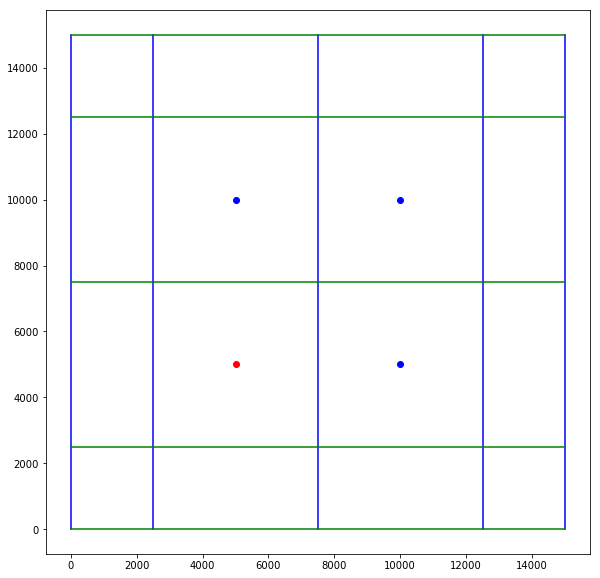

In [102]:
#code to create grid 1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

#pumping well
x1_0 = 5000
y1_0 = 5000
def wel_pump1(x1_0, y1_0, sym):
    plt.plot(x1_0, y1_0, sym)
wel_pump1(x1_0, y1_0, sym='ro')
#well 1
x1_1 = 5000
y1_1 = 10000
def wel_sp1_1(x1_1, y1_1, sym):
    plt.plot(x1_1, y1_1, sym)
wel_sp1_1(x1_1, y1_1, sym='bo')
#well 2
x1_2 = 10000
y1_2 = 10000
def wel_sp1_2(x1_2, y1_2, sym):
    plt.plot(x1_2, y1_2, sym)
wel_sp1_2(x1_2, y1_2, sym='bo')
#well 3
x1_3 = 10000
y1_3 = 5000
def wel_sp1_3(x1_3, y1_3, sym):
    plt.plot(x1_3, y1_3, sym)
wel_sp1_3(x1_3, y1_3, sym='bo')

In [74]:
#Flopy objects
modelname1 = 'p8_pb1' #short for problem 8 part b, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

In [75]:
#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [76]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

In [119]:
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...


In [120]:
#pcg package
mxiter = 50
hclose = 0.0001
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


In [121]:
#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

In [122]:
#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [167]:
#ghb package
ipakcb = 50
stage = 0.0
cond1 = ((2400 * 2500)/1250)
cond2 = ((2400 * 5000)/1250)
ghb_sp1 = [[0, 0, 0, stage, cond1],
           [0, 0, 1, stage, cond2],
           [0, 0, 2, stage, cond2],
           [0, 0, 3, stage, cond1]]
ghb_spd = {0: ghb_sp1}
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfghb.ModflowGhb'> <class 'flopy.modflow.mfghb.ModflowGhb'>
replacing existing Package...
[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 9600.0], [0, 0, 2, 0.0, 9600.0], [0, 0, 3, 0.0, 4800.0]]


In [168]:
# Write the MODFLOW model input files
mf1.write_input()

In [169]:
# Run the MODFLOW model
success, buff = mf1.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pa1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/21 12:47:46

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Gro

### Grid 2

| Column # | Row Spacing |
|----------|-------------|
| 1        | 1750        |
| 2        | 2000        |
| 3        | 2500        |
| 4        | 2500        |
| 5        | 2500        |
| 6        | 2000        |
| 7        | 1750        |

In [170]:
print(os.getcwd())
delr2 = [] #creates an empty list
f2 = open('../Data/table8.1_grid2.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f2):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist2 = line.strip().split(',') 
    
    value2 = float(linelist2[1]) #changes the values in the list to floats
    print(value2) #prints the values
    delr2.append(value2) #puts the floats into the empty list, delr 
    
print(delr2) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
1750.0
2000.0
2500.0
2500.0
2500.0
2000.0
1750.0
[1750.0, 2000.0, 2500.0, 2500.0, 2500.0, 2000.0, 1750.0]


[ 1750.  2000.  2500.  2500.  2500.  2000.  1750.]
15000.0


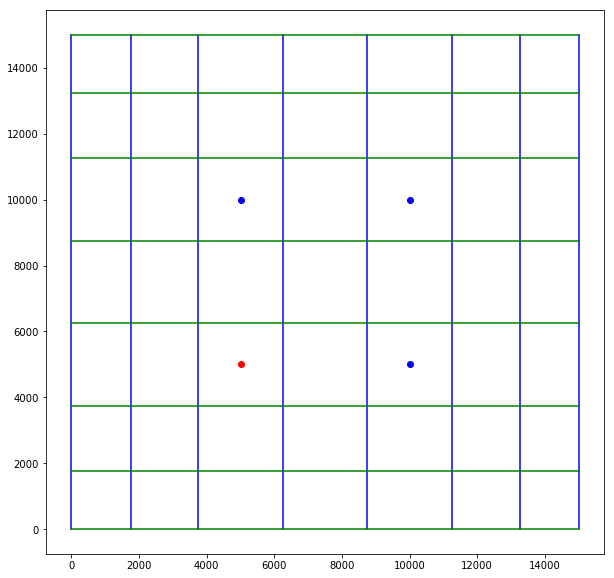

In [171]:
#code to create grid 2
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array2 = np.array(delr2) #changes delr values from float to array
print (delr_array2) #prints those values
print (delr_array2.sum()) #prints the sum of those values
ymax2 = delr_array2.sum() #assigns the sum of the list to ymax
ymin2 = 0 #sets ymin equal to zero
xmax2 = ymax2 #makes xmax equal to ymax which is equal to the sum of the list
xmin2 = 0 #sets xmin equal to zero
x2 = 0 #sets x equal to zero
y2 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin2, xmin2], [ymin2, ymax2], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx2 in delr2: #dx will go through the values in delr one by one in the loop
    x2 = x2 + dx2 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x2, x2], [ymin2, ymax2], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin2, xmax2], [ymin2, ymin2], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy2 in delr2: 
    y2 = y2 + dy2
    plt.plot([xmin2, xmax2], [y2, y2], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean2 = delr_array2.sum() * .5
ymean2 = delr_array2.sum() * .5

#pumping well
x2_0 = 5000
y2_0 = 5000
def wel_pump2(x2_0, y2_0, sym):
    plt.plot(x2_0, y2_0, sym)
wel_pump2(x2_0, y2_0, sym='ro')
#well 1
x2_1 = 5000
y2_1 = 10000
def wel_sp2_1(x2_1, y2_1, sym):
    plt.plot(x2_1, y2_1, sym)
wel_sp2_1(x2_1, y2_1, sym='bo')
#well 2
x2_2 = 10000
y2_2 = 10000
def wel_sp2_2(x2_2, y2_2, sym):
    plt.plot(x2_2, y2_2, sym)
wel_sp2_2(x2_2, y2_2, sym='bo')
#well 3
x2_3 = 10000
y2_3 = 5000
def wel_sp2_3(x2_3, y2_3, sym):
    plt.plot(x2_3, y2_3, sym)
wel_sp2_3(x2_3, y2_3, sym='bo')

In [172]:
#Flopy objects
modelname2 = 'p8_pb2' #short for problem 8 part b, grid 2
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws2 = 'temp'
mf2 = flopy.modflow.Modflow(modelname2, exe_name=exe_name, model_ws = model_ws2)

In [173]:
#dis package
#call in the discretization package
nlay = 1
nrow = 7
ncol = 7
delr = delr2
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis2 = flopy.modflow.ModflowDis(mf2, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [174]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas2 = flopy.modflow.ModflowBas(mf2, ibound=ibound, strt=strt)

In [175]:
pr2 = 15000 #pumping rate
wel_sp2 = [[0, 4, 2, pr2],
             [0, 2, 2, -pr2],
             [0, 2, 4, -pr2],
             [0, 4, 4, -pr2]]
stress_period_data = {0: wel_sp2}
wel2 = flopy.modflow.ModflowWel(mf2, stress_period_data=stress_period_data)

In [176]:
#pcg package
mxiter = 50
hclose = 0.0001
pcg2 = flopy.modflow.ModflowPcg(mf2, mxiter=mxiter, hclose=hclose)

In [177]:
#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf2 = flopy.modflow.ModflowLpf(mf2, hk=hk, laytyp=laytyp)

In [178]:
#oc package
oc2 = flopy.modflow.ModflowOc(mf2)

In [181]:
#ghb package
ipakcb = 50
stage = 0.0
cond1 = ((2400 * 1750)/875)
cond2 = ((2400 * 2000)/875)
cond3 = ((2400 * 2500)/875)
ghb_sp2 = [[0, 0, 0, stage, cond1],
           [0, 0, 1, stage, cond2],
           [0, 0, 2, stage, cond3],
           [0, 0, 3, stage, cond3],
           [0, 0, 4, stage, cond3],
           [0, 0, 5, stage, cond2],
           [0, 0, 6, stage, cond1]]
ghb_spd = {0: ghb_sp2}
ghb2 = flopy.modflow.ModflowGhb(mf2, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp2)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfghb.ModflowGhb'> <class 'flopy.modflow.mfghb.ModflowGhb'>
replacing existing Package...
[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 5485.714285714285], [0, 0, 2, 0.0, 6857.142857142857], [0, 0, 3, 0.0, 6857.142857142857], [0, 0, 4, 0.0, 6857.142857142857], [0, 0, 5, 0.0, 5485.714285714285], [0, 0, 6, 0.0, 4800.0]]


In [182]:
# Write the MODFLOW model input files
mf2.write_input()

In [183]:
# Run the MODFLOW model
success, buff = mf2.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pa2.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/21 12:48:43

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Gro

### Grid 3

| Column # | Row Spacing |
|----------|-------------|
| 1        | 1250        |
| 2        | 1666.7      |
| 3        | 1666.7      |
| 4        | 1666.7      |
| 5        | 1666.7      |
| 6        | 1666.7      |
| 7        | 1666.7      |
| 8        | 1666.7      |
| 9        | 1666.7      |
| 10       | 1250        |

In [30]:
print(os.getcwd())
delr3 = [] #creates an empty list
f3 = open('../Data/table8.1_grid3.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f3):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist3 = line.strip().split(',') 
    
    value3 = float(linelist3[1]) #changes the values in the list to floats
    print(value3) #prints the values
    delr3.append(value3) #puts the floats into the empty list, delr 
    
print(delr3) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
1250.0
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1250.0
[1250.0, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1250.0]


[ 1250.   1666.7  1666.7  1666.7  1666.7  1666.7  1666.7  1666.7  1666.7
  1250. ]
15833.6


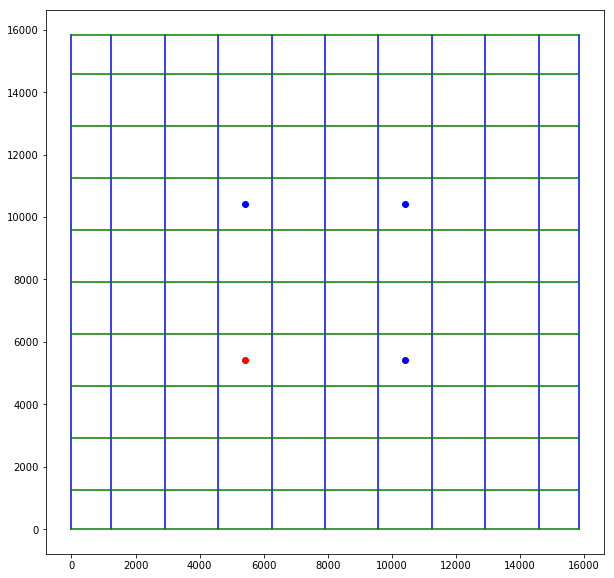

In [140]:
#code to create grid 3
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array3 = np.array(delr3) #changes delr values from float to array
print (delr_array3) #prints those values
print (delr_array3.sum()) #prints the sum of those values
ymax3 = delr_array3.sum() #assigns the sum of the list to ymax
ymin3 = 0 #sets ymin equal to zero
xmax3 = ymax3 #makes xmax equal to ymax which is equal to the sum of the list
xmin3 = 0 #sets xmin equal to zero
x3 = 0 #sets x equal to zero
y3 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin3, xmin3], [ymin3, ymax3], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx3 in delr3: #dx will go through the values in delr one by one in the loop
    x3 = x3 + dx3 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x3, x3], [ymin3, ymax3], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin3, xmax3], [ymin3, ymin3], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy3 in delr3: 
    y3 = y3 + dy3
    plt.plot([xmin3, xmax3], [y3, y3], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean2 = delr_array3.sum() * .5
ymean2 = delr_array3.sum() * .5

#pumping well
x3_0 = 5416.75
y3_0 = 5416.75
def wel_pump3(x3_0, y3_0, sym):
    plt.plot(x3_0, y3_0, sym)
wel_pump3(x3_0, y3_0, sym='ro')
#well 1
x3_1 = 5416.75
y3_1 = 10416.85
def wel_sp3_1(x3_1, y3_1, sym):
    plt.plot(x3_1, y3_1, sym)
wel_sp3_1(x3_1, y3_1, sym='bo')
#well 2
x3_2 = 10416.85
y3_2 = 10416.85
def wel_sp3_2(x3_2, y3_2, sym):
    plt.plot(x3_2, y3_2, sym)
wel_sp3_2(x3_2, y3_2, sym='bo')
#well 3
x3_3 = 10416.85
y3_3 = 5416.75
def wel_sp3_3(x3_3, y3_3, sym):
    plt.plot(x3_3, y3_3, sym)
wel_sp3_3(x3_3, y3_3, sym='bo')

In [104]:
#Flopy objects
modelname3 = 'p8_pb3' #short for problem 8 part b, grid 3
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws3 = 'temp'
mf3 = flopy.modflow.Modflow(modelname3, exe_name=exe_name, model_ws = model_ws3)

In [105]:
#dis package
#call in the discretization package
nlay = 1
nrow = 10
ncol = 10
delr = delr3
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis3 = flopy.modflow.ModflowDis(mf3, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [106]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas3 = flopy.modflow.ModflowBas(mf3, ibound=ibound, strt=strt)

In [107]:
pr3 = 15000 #pumping rate
wel_sp3 = [[0, 6, 3, pr3],
         [0, 3, 3, -pr3],
         [0, 3, 6, -pr3],
         [0, 6, 6, -pr3]]
stress_period_data = {0: wel_sp3}
wel3 = flopy.modflow.ModflowWel(mf3, stress_period_data=stress_period_data)

In [108]:
#pcg package
mxiter = 50
hclose = 0.0001
pcg3 = flopy.modflow.ModflowPcg(mf3, mxiter=mxiter, hclose=hclose)

In [109]:
#lpf package
hk = 2400 #times cell thickness top-botm
laytyp = np.zeros((nlay))
lpf3 = flopy.modflow.ModflowLpf(mf3, hk=hk, laytyp=laytyp)

In [110]:
#oc package
oc3 = flopy.modflow.ModflowOc(mf3)

In [188]:
#ghb package
ipakcb = 50
stage = 0.0
cond1 = ((2400 * 1250)/625)
cond2 = ((2400 * 1666.7)/625)
ghb_sp3 = [[0, 0, 0, stage, cond1],
           [0, 0, 1, stage, cond2],
           [0, 0, 2, stage, cond2],
           [0, 0, 3, stage, cond2],
           [0, 0, 4, stage, cond2],
           [0, 0, 5, stage, cond2],
           [0, 0, 6, stage, cond2],
           [0, 0, 7, stage, cond2],
           [0, 0, 8, stage, cond2],
           [0, 0, 9, stage, cond1]]
ghb_spd = {0: ghb_sp3}
ghb3 = flopy.modflow.ModflowGhb(mf3, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp3)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfghb.ModflowGhb'> <class 'flopy.modflow.mfghb.ModflowGhb'>
replacing existing Package...
[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 6400.128], [0, 0, 2, 0.0, 6400.128], [0, 0, 3, 0.0, 6400.128], [0, 0, 4, 0.0, 6400.128], [0, 0, 5, 0.0, 6400.128], [0, 0, 6, 0.0, 6400.128], [0, 0, 7, 0.0, 6400.128], [0, 0, 8, 0.0, 6400.128], [0, 0, 9, 0.0, 4800.0]]


In [186]:
# Write the MODFLOW model input files
mf3.write_input()

In [187]:
# Run the MODFLOW model
success, buff = mf3.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pa3.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/21 12:51:23

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Gro

### Grid 4

| Column # | Row Spacing |
|----------|-------------|
| 1        | 500         |
| 2        | 1000        |
| 3        | 1000        |
| 4        | 1000        |
| 5        | 1000        |
| 6        | 1000        |
| 7        | 1000        |
| 8        | 1000        |
| 9        | 1000        |
| 10       | 1000        |
| 11       | 1000        |
| 12       | 1000        |
| 13       | 1000        |
| 14       | 1000        |
| 15       | 1000        |
| 16       | 500         |

In [39]:
print(os.getcwd())
delr4 = [] #creates an empty list
f4 = open('../Data/table8.1_grid4.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f4):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist4 = line.strip().split(',') 
    
    value4 = float(linelist4[1]) #changes the values in the list to floats
    print(value4) #prints the values
    delr4.append(value4) #puts the floats into the empty list, delr 
    
print(delr4) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
500.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
500.0
[500.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 500.0]


[  500.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.   500.]
15000.0


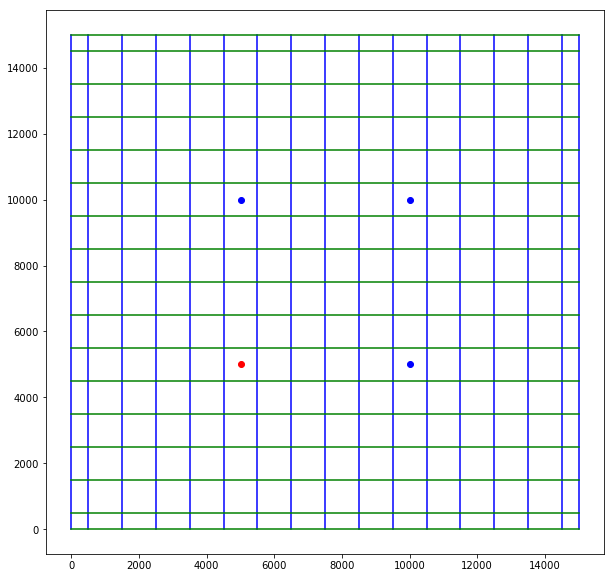

In [150]:
#code to create grid 4
fig4 = plt.figure(figsize=(10, 10))
ax4 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array4 = np.array(delr4) #changes delr values from float to array
print (delr_array4) #prints those values
print (delr_array4.sum()) #prints the sum of those values
ymax4 = delr_array4.sum() #assigns the sum of the list to ymax
ymin4 = 0 #sets ymin equal to zero
xmax4 = ymax4 #makes xmax equal to ymax which is equal to the sum of the list
xmin4 = 0 #sets xmin equal to zero
x4 = 0 #sets x equal to zero
y4 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin4, xmin4], [ymin4, ymax4], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx4 in delr4: #dx will go through the values in delr one by one in the loop
    x4 = x4 + dx4 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x4, x4], [ymin4, ymax4], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin4, xmax4], [ymin4, ymin4], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy4 in delr4: 
    y4 = y4 + dy4
    plt.plot([xmin4, xmax4], [y4, y4], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean2 = delr_array4.sum() * .5
ymean2 = delr_array4.sum() * .5

#pumping well
x4_0 = 5000
y4_0 = 5000
def wel_pump4(x4_0, y4_0, sym):
    plt.plot(x4_0, y4_0, sym)
wel_pump4(x4_0, y4_0, sym='ro')
#well 1
x4_1 = 5000
y4_1 = 10000
def wel_sp4_1(x4_1, y4_1, sym):
    plt.plot(x4_1, y4_1, sym)
wel_sp4_1(x4_1, y4_1, sym='bo')
#well 2
x4_2 = 10000
y4_2 = 10000
def wel_sp4_2(x4_2, y4_2, sym):
    plt.plot(x4_2, y4_2, sym)
wel_sp4_2(x4_2, y4_2, sym='bo')
#well 3
x4_3 = 10000
y4_3 = 5000
def wel_sp4_3(x4_3, y4_3, sym):
    plt.plot(x4_3, y4_3, sym)
wel_sp4_3(x4_3, y4_3, sym='bo')

In [41]:
#Flopy objects
modelname4 = 'p8_pb4' #short for problem 8 part b, grid 4
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws4 = 'temp'
mf4 = flopy.modflow.Modflow(modelname4, exe_name=exe_name, model_ws = model_ws4)

In [42]:
#dis package
#call in the discretization package
nlay = 1
nrow = 10
ncol = 10
delr = delr4
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis4 = flopy.modflow.ModflowDis(mf4, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [43]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas4 = flopy.modflow.ModflowBas(mf4, ibound=ibound, strt=strt)

In [195]:
#wel package
pr4 = 15000 #pumping rate
wel_sp4 = [[0, 10, 5, pr4],
           [0, 5, 5, -pr4],
           [0, 5, 10, -pr4],
           [0, 10, 10, -pr4]]
stress_period_data = {0: wel_sp4}
wel4 = flopy.modflow.ModflowWel(mf4, stress_period_data=stress_period_data)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...


In [127]:
#pcg package
mxiter = 50
hclose = 0.0001
pcg4 = flopy.modflow.ModflowPcg(mf4, mxiter=mxiter, hclose=hclose)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


In [128]:
#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf4 = flopy.modflow.ModflowLpf(mf4, hk=hk, laytyp=laytyp)

In [129]:
#oc package
oc4 = flopy.modflow.ModflowOc(mf4)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [189]:
#ghb package
ipakcb = 50
stage = 0.0
cond1 = ((2400 * 500)/250)
cond2 = ((2400 * 1000)/500)
ghb_sp4 = [[0, 0, 0, stage, cond1],
           [0, 0, 1, stage, cond2],
           [0, 0, 2, stage, cond2],
           [0, 0, 3, stage, cond2],
           [0, 0, 4, stage, cond2],
           [0, 0, 5, stage, cond2],
           [0, 0, 6, stage, cond2],
           [0, 0, 7, stage, cond2],
           [0, 0, 8, stage, cond2],
           [0, 0, 9, stage, cond2],
           [0, 0, 10, stage, cond2],
           [0, 0, 11, stage, cond2],
           [0, 0, 12, stage, cond2],
           [0, 0, 13, stage, cond2],
           [0, 0, 14, stage, cond2],
           [0, 0, 15, stage, cond1]]
ghb_spd = {0: ghb_sp4}
ghb4 = flopy.modflow.ModflowGhb(mf4, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp4)

[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 4800.0], [0, 0, 2, 0.0, 4800.0], [0, 0, 3, 0.0, 4800.0], [0, 0, 4, 0.0, 4800.0], [0, 0, 5, 0.0, 4800.0], [0, 0, 6, 0.0, 4800.0], [0, 0, 7, 0.0, 4800.0], [0, 0, 8, 0.0, 4800.0], [0, 0, 9, 0.0, 4800.0], [0, 0, 10, 0.0, 4800.0], [0, 0, 11, 0.0, 4800.0], [0, 0, 12, 0.0, 4800.0], [0, 0, 13, 0.0, 4800.0], [0, 0, 14, 0.0, 4800.0], [0, 0, 15, 0.0, 4800.0]]


In [190]:
# Write the MODFLOW model input files
mf4.write_input()

In [191]:
# Run the MODFLOW model
success, buff = mf4.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pa4.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/21 12:55:24

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Gro

### Grid 5

| Column # | Row Spacing |
|----------|-------------|
| 1        | 416.7       |
| 2        | 416.7       |
| 3        | 416.7       |
| 4        | 416.7       |
| 5        | 416.7       |
| 6        | 416.7       |
| 7        | 555.6       |
| 8        | 555.6       |
| 9        | 555.6       |
| 10       | 555.6       |
| 11       | 555.6       |
| 12       | 555.6       |
| 13       | 555.6       |
| 14       | 555.6       |
| 15       | 555.6       |
| 16       | 555.6       |
| 17       | 555.6       |
| 18       | 555.6       |
| 19       | 555.6       |
| 20       | 555.6       |
| 21       | 555.6       |
| 22       | 555.6       |
| 23       | 555.6       |
| 24       | 555.6       |
| 25       | 416.7       |
| 26       | 416.7       |
| 27       | 416.7       |
| 28       | 416.7       |
| 29       | 416.7       |
| 30       | 416.7       |

In [48]:
print(os.getcwd())
delr5 = [] #creates an empty list
f5 = open('../Data/table8.1_grid5.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f5):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist5 = line.strip().split(',') 
    
    value5 = float(linelist5[1]) #changes the values in the list to floats
    print(value5) #prints the values
    delr5.append(value5) #puts the floats into the empty list, delr 
    
print(delr5) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
416.7
416.7
416.7
416.7
416.7
416.7
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
416.7
416.7
416.7
416.7
416.7
416.7
[416.7, 416.7, 416.7, 416.7, 416.7, 416.7, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 416.7, 416.7, 416.7, 416.7, 416.7, 416.7]


[ 416.7  416.7  416.7  416.7  416.7  416.7  555.6  555.6  555.6  555.6
  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6
  555.6  555.6  555.6  555.6  416.7  416.7  416.7  416.7  416.7  416.7]
15001.2


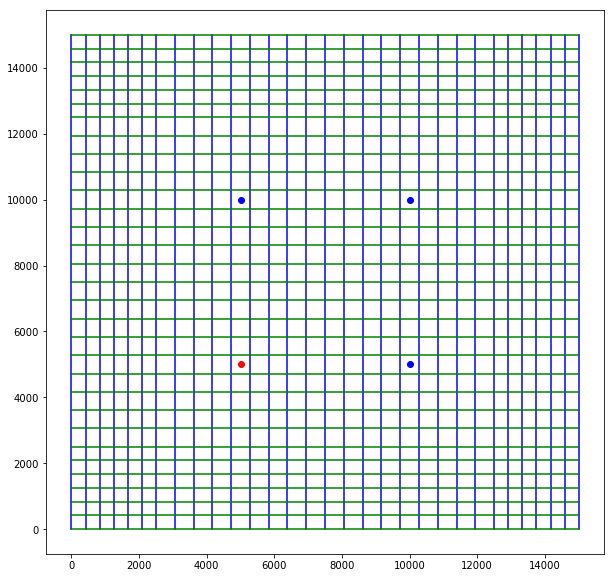

In [151]:
#code to create grid 5
fig5 = plt.figure(figsize=(10, 10))
ax5 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array5 = np.array(delr5) #changes delr values from float to array
print (delr_array5) #prints those values
print (delr_array5.sum()) #prints the sum of those values
ymax5 = delr_array5.sum() #assigns the sum of the list to ymax
ymin5 = 0 #sets ymin equal to zero
xmax5 = ymax5 #makes xmax equal to ymax which is equal to the sum of the list
xmin5 = 0 #sets xmin equal to zero
x5 = 0 #sets x equal to zero
y5 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin5, xmin5], [ymin5, ymax5], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx5 in delr5: #dx will go through the values in delr one by one in the loop
    x5 = x5 + dx5 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x5, x5], [ymin5, ymax5], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin5, xmax5], [ymin5, ymin5], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy5 in delr5: 
    y5 = y5 + dy5
    plt.plot([xmin5, xmax5], [y5, y5], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean2 = delr_array5.sum() * .5
ymean2 = delr_array5.sum() * .5

#pumping well
x5_0 = 5000.4
y5_0 = 5000.4
def wel_pump5(x5_0, y5_0, sym):
    plt.plot(x5_0, y5_0, sym)
wel_pump5(x5_0, y5_0, sym='ro')
#well 1
x5_1 = 5000.4
y5_1 = 10000.8
def wel_sp5_1(x5_1, y5_1, sym):
    plt.plot(x5_1, y5_1, sym)
wel_sp5_1(x5_1, y5_1, sym='bo')
#well 2
x5_2 = 10000.8
y5_2 = 10000
def wel_sp5_2(x5_2, y5_2, sym):
    plt.plot(x5_2, y5_2, sym)
wel_sp5_2(x5_2, y5_2, sym='bo')
#well 3
x5_3 = 10000.8
y5_3 = 5000
def wel_sp5_3(x5_3, y5_3, sym):
    plt.plot(x5_3, y5_3, sym)
wel_sp5_3(x5_3, y5_3, sym='bo')

In [50]:
#Flopy objects
modelname5 = 'p8_pb5' #short for problem 8 part b, grid 5
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws5 = 'temp'
mf5 = flopy.modflow.Modflow(modelname5, exe_name=exe_name, model_ws = model_ws5)

In [51]:
#dis package
nlay = 1
nrow = 30
ncol = 30
delr = delr5
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis5 = flopy.modflow.ModflowDis(mf5, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [52]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas5 = flopy.modflow.ModflowBas(mf5, ibound=ibound, strt=strt)

In [132]:
#wel package
# Remember to use zero-based layer, row, column indices!
pr5 = 15000 #pumping rate
wel_sp5 = [[0, 19, 10, pr5],
             [0, 10, 10, -pr5],
             [0, 10, 19, -pr5],
             [0, 19, 19, -pr5]]
stress_period_data = {0: wel_sp5}
wel5 = flopy.modflow.ModflowWel(mf5, stress_period_data=stress_period_data)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...


In [133]:
#pcg package
mxiter = 50
hclose = 0.0001
pcg5 = flopy.modflow.ModflowPcg(mf5, mxiter=mxiter, hclose=hclose)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


In [134]:
#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf5 = flopy.modflow.ModflowLpf(mf5, hk=hk, laytyp=laytyp)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...


In [135]:
#oc package
oc5 = flopy.modflow.ModflowOc(mf5)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [196]:
#ghb package
ipakcb = 50
stage = 0.0
cond1 = ((2400 * 416.7)/208.35)
cond2 = ((2400 * 555.6)/208.35)
ghb_sp5 = [[0, 0, 0, stage, cond1],
           [0, 0, 1, stage, cond1],
           [0, 0, 2, stage, cond1],
           [0, 0, 3, stage, cond1],
           [0, 0, 4, stage, cond1],
           [0, 0, 5, stage, cond1],
           [0, 0, 6, stage, cond2],
           [0, 0, 7, stage, cond2],
           [0, 0, 8, stage, cond2],
           [0, 0, 9, stage, cond2],
           [0, 0, 10, stage, cond2],
           [0, 0, 11, stage, cond2],
           [0, 0, 12, stage, cond2],
           [0, 0, 13, stage, cond2],
           [0, 0, 14, stage, cond2],
           [0, 0, 15, stage, cond2],
           [0, 0, 16, stage, cond2],
           [0, 0, 17, stage, cond2],
           [0, 0, 18, stage, cond2],
           [0, 0, 19, stage, cond2],
           [0, 0, 20, stage, cond2],
           [0, 0, 21, stage, cond2],
           [0, 0, 22, stage, cond2],
           [0, 0, 23, stage, cond2],
           [0, 0, 24, stage, cond1],
           [0, 0, 25, stage, cond1],
           [0, 0, 26, stage, cond1],
           [0, 0, 27, stage, cond1],
           [0, 0, 28, stage, cond1],
           [0, 0, 29, stage, cond1]]
ghb_spd = {0: ghb_sp5}
ghb5 = flopy.modflow.ModflowGhb(mf5, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp5)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfghb.ModflowGhb'> <class 'flopy.modflow.mfghb.ModflowGhb'>
replacing existing Package...
[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 4800.0], [0, 0, 2, 0.0, 4800.0], [0, 0, 3, 0.0, 4800.0], [0, 0, 4, 0.0, 4800.0], [0, 0, 5, 0.0, 4800.0], [0, 0, 6, 0.0, 6400.0], [0, 0, 7, 0.0, 6400.0], [0, 0, 8, 0.0, 6400.0], [0, 0, 9, 0.0, 6400.0], [0, 0, 10, 0.0, 6400.0], [0, 0, 11, 0.0, 6400.0], [0, 0, 12, 0.0, 6400.0], [0, 0, 13, 0.0, 6400.0], [0, 0, 14, 0.0, 6400.0], [0, 0, 15, 0.0, 6400.0], [0, 0, 16, 0.0, 6400.0], [0, 0, 17, 0.0, 6400.0], [0, 0, 18, 0.0, 6400.0], [0, 0, 19, 0.0, 6400.0], [0, 0, 20, 0.0, 6400.0], [0, 0, 21, 0.0, 6400.0], [0, 0, 22, 0.0, 6400.0], [0, 0, 23, 0.0, 6400.0], [0, 0, 24, 0.0, 4800.0], [0, 0, 25, 0.0, 4800.0], [0, 0, 26, 0.0, 4800.0], [0, 0, 27, 0.0, 4800.0], [0, 0, 28, 0.0, 4800.0], [0, 0, 29, 0.0, 4800.0]]


In [197]:
# Write the MODFLOW model input files
mf5.write_input()

In [198]:
# Run the MODFLOW model
success, buff = mf5.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pa5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/21 13:04:15

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Gro

In [199]:
import pandas as pd
table = pd.read_csv('../Data/table8.2.csv')

table.columns #displays all the column names in the file

#prints out the first 5 rows into a table
table.head()

,Grid,# Nodes,Total Iteration,CPU',1,2,3
0,1,16.0,47.0,5.64,1.956,1.493,2.806
1,2,49.0,74.0,8.12,1.971,1.537,2.816
2,3,100.0,96.0,13.02,1.962,1.546,2.807
3,4,256.0,124.0,30.33,1.955,1.550,2.801
4,5,900.0,143.0,106.54,1.952,1.550,2.797


In [200]:
#prints the whole dataframe instead of just the first 5 rows
print(table5)

       Grid  # Nodes  Total Iteration    CPU'      1      2      3
0         1     16.0             47.0    5.64  1.956  1.493  2.806
1         2     49.0             74.0    8.12  1.971  1.537  2.816
2         3    100.0             96.0   13.02  1.962  1.546  2.807
3         4    256.0            124.0   30.33  1.955  1.550  2.801
4         5    900.0            143.0  106.54  1.952  1.550  2.797
5  analytic      NaN              NaN     NaN  2.040  1.630  2.950


### MODEL OUTPUT

Drawdown, iteration and CPU data are given in Tables 8.2.8.3.8.4, and 8.5 for parts a, b,

c, and d, respectively. A comparison is also made to analytical results obtained from the

image well technique.

### DISCUSSION OF RESULTS

Drawdowns for the final timestep of part b are shown in Figure 8.3 for the 16 x 16 grid.

The accuracy of the answer is highly dependent upon the grid configuration used (Table 8.3).

This is because in early time, the gradients are much steeper in the vicinity of the pumping

well. A fine grid can approximate this rapid spatial variation much better than a coarse grid.

Notice that the grid design can take on vastly different configurations depending on the intent

of the modeling. As a general role, the grid should be designed to match the curvature of the

drawdown cone.